In [1]:
import os
import random
import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [93]:
#util
def is_image_file(filename):
    IMG_EXTENSIONS = [
        '.jpg', '.JPG', '.jpeg', '.JPEG',
        '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP', 'tif', 'tiff'
    ]
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)

def make_dataset(dir, max_dataset_size=float("inf")):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    for root, _, fnames in sorted(os.walk(dir)):
        for fname in fnames:
            if is_image_file(fname):
                path = os.path.join(root, fname)
                images.append(path)
    return images[:min(max_dataset_size, len(images))]

In [94]:
data_path = '/opt/ml/workspace/defense_dataset/train'
A_paths = sorted(make_dataset(os.path.join(data_path, 'x')))
L_paths = sorted(make_dataset(os.path.join(data_path, 'y')))

In [57]:
img = Image.open(A_paths[0])
img = np.asarray(img)
img_shape = img.shape
img1 = Image.fromarray(img[:, :img_shape[1]//2, :])
img2 = Image.fromarray(img[:, img_shape[1]//2:, :])
img1 = np.asarray(img1)
img2 = np.asarray(img2)
img1 = cv2.resize(img1, dsize = (754, 754), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, dsize = (754, 754), interpolation=cv2.INTER_CUBIC)
print(img1.shape, img2.shape)

(754, 754, 3) (754, 754, 3)


In [51]:
img = Image.open(L_paths[0])
img = np.asarray(img)
img_shape = img.shape
print(img_shape)
label1 = Image.fromarray(img[:, :img_shape[1]//2])
label2 = Image.fromarray(img[:, img_shape[1]//2:])
label1 = label1.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
label1 = np.asarray(label1)
label2 = label2.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
label2 = np.asarray(label2)
# label = label1 + label2
# print(label1.shape, label2.shape)
# print(label.shape)
# print(np.where(label == 4))

(754, 1508)
(744, 744)


In [53]:
for L_path in L_paths:
    img = Image.open(L_path)
    img = np.asarray(img)
    label1 = Image.fromarray(img[:, :img_shape[1]//2])
    label2 = Image.fromarray(img[:, img_shape[1]//2:])
    label1 = label1.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
    label1 = np.asarray(label1)
    label2 = label2.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
    label2 = np.asarray(label2)
    err_1_height, err_1_width = np.where(label1 == 1)
    err_2_height, err_2_width = np.where(label2 == 2)
    err_3_height, err_3_width = np.where(label1 == 3)
    
#     label1 = cv2.resize(label1, dsize = (754, 754), interpolation=cv2.INTER_NEAREST)
#     label2 = cv2.resize(label2, dsize = (754, 754), interpolation=cv2.INTER_NEAREST)
    label = label1 + label2
#     err_1_height, err_1_width = np.where(label1 == 1)
#     err_2_height, err_2_width = np.where(label2 == 2)
#     err_3_height, err_3_width = np.where(label1 == 3)
    if err_1_height.size != 0 or err_1_width.size != 0:
        print(err_1_width, err_1_height)
        print(f"1_error {L_path}")
    if err_2_height.size != 0 or err_2_width.size != 0:
        print(err_2_width, err_2_height)
        print(f"2_error {L_path}")
    if err_3_height.size != 0 or err_3_width.size != 0:
        print(err_3_width, err_3_height)
        print(f"3_error {L_path}")
# #     height, width = np.where(label >= 4)
#     if height.size != 0 or width.size != 0:
#         print(L_path)
# #         print(height, width)
#         print(label1[height[0], width[0]])
#         print(label2[height[0], width[0]])

[742 743 742 743 742 743 742 743 742 743 742 743 742 743 742 743 742 743
 742 743 742 743 742 743 742 743 742 743 742 743 742 743 742 743 742 743
 742 743 742 743 742 743 742 743 742 743 742 743 742 743 742 743 742 743
 742 743 742 743 742 743 742 743 742 743 743 743 743 743 743 743 743 743
 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743
 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743
 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743
 743 743 743 743 743 743] [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95 96 97 98 99]
3_error /opt/ml/workspace/defense_dataset/train/y/2016_KSG_J

In [95]:
for L_path in L_paths:
    img = Image.open(L_path)
    img = np.asarray(img)
    label1 = Image.fromarray(img[:, :img_shape[1]//2])
    label2 = Image.fromarray(img[:, img_shape[1]//2:])
    label1 = label1.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
    label1 = np.asarray(label1)
    label2 = label2.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
    label2 = np.asarray(label2)
#     err_1_height, err_1_width = np.where(label1 == 1)
#     err_2_height, err_2_width = np.where(label2 == 2)
#     err_3_height, err_3_width = np.where(label1 == 3)
    label1 = cv2.resize(label1, dsize = (754, 754), interpolation=cv2.INTER_NEAREST)
    label2 = cv2.resize(label2, dsize = (754, 754), interpolation=cv2.INTER_NEAREST)
    label1 = Image.fromarray(label1)
    label2 = Image.fromarray(label2)
    
    label1 = label1.crop([5,5,749,749])
    label1 = np.asarray(label1)
    label2 = label2.crop([5,5,749,749])
    label2 = np.asarray(label2)
    h, w = np.where(label2 == 3)
    label2 = label2.copy()
    label2[h, w] = 0
    label = label1 + label2
   
        
#     err_1_height, err_1_width = np.where(label1 == 1)
#     err_2_height, err_2_width = np.where(label2 == 2)
#     err_3_height, err_3_width = np.where(label1 == 3)
#     if err_1_height.size != 0 or err_1_width.size != 0:
#         print(err_1_width, err_1_height)
#         print(f"1_error {L_path}")
#     if err_2_height.size != 0 or err_2_width.size != 0:
#         print(err_2_width, err_2_height)
#         print(f"2_error {L_path}")
#     if err_3_height.size != 0 or err_3_width.size != 0:
#         print(err_3_width, err_3_height)
#         print(f"3_error {L_path}")
    height, width = np.where(label >= 3)
    if height.size != 0 or width.size != 0:
        print(L_path)
#         print(height, width)
        print(label1[height[0], width[0]])
        print(label2[height[0], width[0]])

KeyboardInterrupt: 

- 1 error
  - 2017_KAG_2LB_000912.png
  - 2019_KBG_3LB_000073.png
  - 2019_KDG_2LB_000871.png
  - 2019_WSN_2LB_000047.png

- 2 error
  - 2019_JNG_1LB_000005.png
  - 2019_KSG_2LB_000374.png
  - 2019_SMG_1LB_000027.png

In [39]:
import cv2
img = cv2.imread(L_paths[300], cv2.IMREAD_GRAYSCALE)


(754, 1508)
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([455, 456, 456, ..., 647, 647, 647]), array([1201, 1200, 1201, ...,  857,  858,  859]))
(array([], dtype=int64), array([], dtype=int64))


['/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000006.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000008.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000014.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000016.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000038.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000053.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000066.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000070.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000073.png', '/opt/ml/workspace/defense_dataset/train/x/2015_DMG_1LB_000082.png']
['/opt/ml/workspace/defense_dataset/train/y/2015_DMG_1LB_000006.png', '/opt/ml/workspace/defense_dataset/train/y/2015_DMG_1LB_000008.png', '/opt/ml/workspace/defense_dataset/train/y/2015_DMG_1LB_000014.png', '/opt/ml/workspace/defense_dataset/train/y/2015_DMG_1LB_000016.png', '/opt/ml/workspace/defense_datas

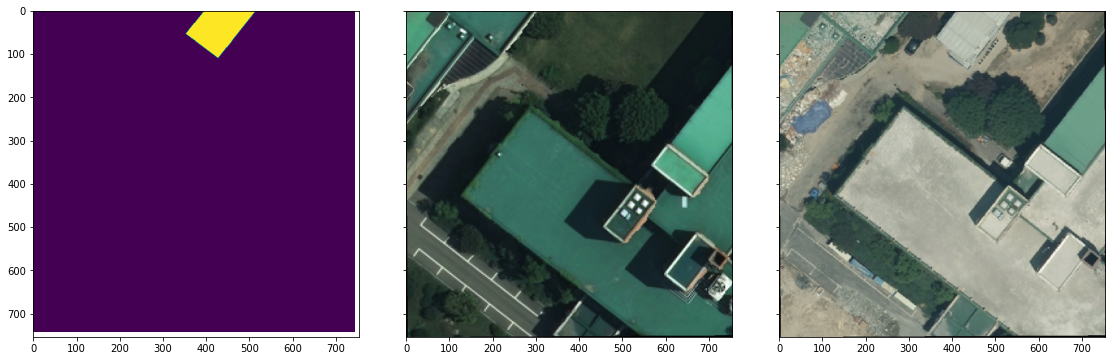

In [98]:
import matplotlib.pyplot as plt

img = Image.open(A_paths[0])
print(A_paths[0:10])
img = np.asarray(img)
img_shape = img.shape
img1 = Image.fromarray(img[:, :img_shape[1]//2, :])
img2 = Image.fromarray(img[:, img_shape[1]//2:, :])
img1 = np.asarray(img1)
img2 = np.asarray(img2)
img1 = cv2.resize(img1, dsize = (754, 754), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, dsize = (754, 754), interpolation=cv2.INTER_CUBIC)
img1 = Image.fromarray(img1)
img2 = Image.fromarray(img2)

img = Image.open(L_paths[0])
print(L_paths[0:10])
img = np.asarray(img)
label1 = Image.fromarray(img[:, :img_shape[1]//2])
label2 = Image.fromarray(img[:, img_shape[1]//2:])
label1 = label1.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
label1 = np.asarray(label1)
label2 = label2.crop([5,5,(img_shape[1]//2)-5,img_shape[0]-5])
label2 = np.asarray(label2)
label1 = cv2.resize(label1, dsize = (754, 754), interpolation=cv2.INTER_NEAREST)
label2 = cv2.resize(label2, dsize = (754, 754), interpolation=cv2.INTER_NEAREST)
label1 = Image.fromarray(label1)
label2 = Image.fromarray(label2)

label1 = label1.crop([5,5,749,749])
label1 = np.asarray(label1)
label2 = label2.crop([5,5,749,749])
label2 = np.asarray(label2)
h, w = np.where(label2 == 3)
label2 = label2.copy()
label2[h, w] = 0
label = label1 + label2
print(label)
label = Image.fromarray(label).convert('L')
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 5))
axes[0].imshow(label)
axes[1].imshow(img1)
axes[2].imshow(img2)
fig.tight_layout()
plt.show()

In [76]:
import segmentation_models_pytorch as smp
model = smp.Unet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=4,                      # model output channels (number of classes in your dataset)
)
mask = model(torch.ones([1, 3, 64, 64]))
a = mask.argmax(1)
print(a)
print(a.shape)
print(label)

tensor([[[3, 1, 3,  ..., 3, 3, 3],
         [1, 0, 3,  ..., 3, 3, 3],
         [1, 0, 3,  ..., 3, 3, 1],
         ...,
         [3, 1, 3,  ..., 0, 3, 1],
         [3, 3, 3,  ..., 0, 0, 1],
         [3, 3, 0,  ..., 3, 3, 3]]])
torch.Size([1, 64, 64])
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
